#Stroop effect

In psychology, the Stroop effect is a demonstration of interference in the reaction time of a task. When the name of a color (e.g., "<span style="color:blue">blue</span>", "<span style="color:green">green</span>", "<span style="color:red">red</span>", etc) is printed in a color not denoted by the name (e.g., "<span style="color:blue">green</span>", "<span style="color:green">red</span>", "<span style="color:red">blue</span>", etc), naming the color of the word takes longer and is more prone to errors than when the color of the ink matches the name of the color. The effect is named after John Ridley Stroop, who first published the effect in English in 1935. [from wikipedia]

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed (e.g., "<span style="color:blue">blue</span>", "<span style="color:green">green</span>", "<span style="color:red">red</span>", etc). In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed (e.g., "<span style="color:blue">green</span>", "<span style="color:green">red</span>", "<span style="color:red">blue</span>", etc). In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.




Data source: Data were downloaded from the google spreadsheet provided for the project. https://docs.google.com/spreadsheets/d/1msocMzhMq9b2EN4-i3pO5D34cZwIslhe3I9AHeir4S8/edit#gid=1526384506


#### 1. What is our independent variable? What is our dependent variable?

In this experiment, independent variable is the task or color condition, 'congruent' or 'Incongruent'.
'Congruent' condition refers to the task condition when the COLOR AND TEXT MATCH for the word. 
'Incongruent' condition refers to the task condition when the COLOR AND TEXT DON'T MATCH for the word. 

Dependent variable is time taken to name the ink colors in equally-sized lists.

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Hypothesis for this experiment is that the task condition (congruent or incongruent), influences the reaction time. More specifically, in incongruent condition (when color and text of the word do not match), it is expected that individuals will have higher reaction time.


Null hypothesis: Humans' ability to read out the text of the color words is not affected by the color of the word. Operationally, humans have the same POPULATION mean for the congruent or incongruent conditions. ($\mu_{congruent} = \mu_{incongruent} $)

Alternative hypothesis: Humans' ability to read out the text of the color words is affected by the color of the word. Humans DO NOT have the same POPULATION mean for the congruent or incongruent conditions. ($\mu_{congruent} \neq \mu_{incongruent} $)


Statistical tests: As same subjects perform tests under congruent and incongruent conditions, a paired two-sided t-test is best suited for this type of experiment. 


#### 3. Descriptive statistics.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing Data
path = r'~/Desktop/DataSc_Udacity/P1/stroopdata.csv'
dataFrame = pd.read_csv(path)
df_mean = dataFrame.mean()
df_std = dataFrame.std()
df_summary = pd.DataFrame({'$mean':[df_mean[0],df_mean[1]], '$std': [df_std[0],df_std[1]]})
df_summary.columns = ['mean','standard deviation']
df_summary.index  = ['Congruent','Incongruent']
df_summary



,mean,standard deviation
Congruent,14.051125,3.559358
Incongruent,22.015917,4.797057


Based on table above, the incongruent condition had higher reaction time than congruent condition. We further investigate these using boxplots. 

#### Data visualizations 
First we draw a boxplot of the data to observe overall spread of the data. 

Populating the interactive namespace from numpy and matplotlib


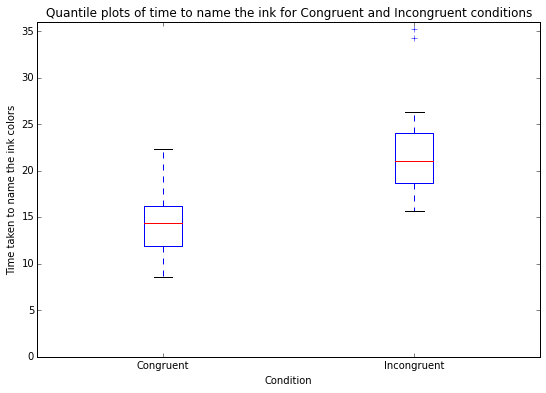

In [46]:
%pylab inline
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
## combine these different collections into a list    
data_to_plot = [ dataFrame['Congruent'],  dataFrame['Incongruent']]
# Create the boxplot
bp = ax.boxplot(data_to_plot)


ax.set_xticklabels(['Congruent', 'Incongruent'])
ax.set_xlabel('Condition')
ax.set_ylabel('Time taken to name the ink colors')
ax.set_ylim(0, 36)
ax.set_title('Quantile plots of time to name the ink for Congruent and Incongruent conditions')

plt.show()

Boxplot above illustrates that the subjects in congruent condition had lower time to name the ink colors. We next plot standard error plots, as these values will be used to compute our statistical tests. 

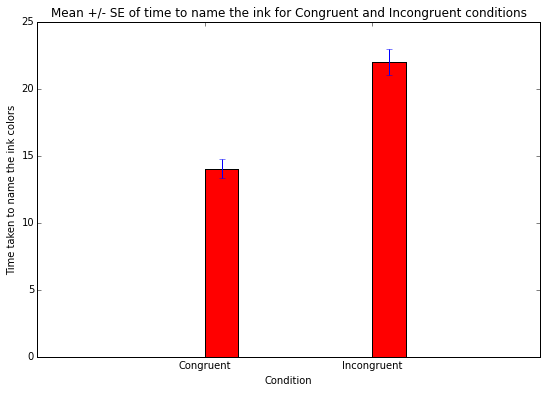

In [47]:
# First illustrate basic pyplot interface, using defaults where possible.
# example data

x = [0.25,.75]
y = df_mean
yerr = df_std/sqrt(len(dataFrame.index))

fig1 = plt.figure(2, figsize=(9, 6))
plt.bar(x, y, .1, color='r',yerr=yerr)
ax1 = fig1.add_subplot(111)
ax1.set_xticks([.25,.75])
ax1.set_xticklabels(['Congruent', 'Incongruent'])
ax1.set_xlabel('Condition')
ax1.set_ylabel('Time taken to name the ink colors')
ax1.set_ylim(0, 25)
ax1.set_xlim(-.25, 1.25)
ax1.set_title('Mean +/- SE of time to name the ink for Congruent and Incongruent conditions')

Based on mean+/- standard error plots, it appears that the subjects in two groups, congruent and incongruent conditions have significantly different times to name the ink. It is expected that a paired t-test will revel a  significant effect of condition (p<0.05). 

#### Statistical Analysis
We perform a paired t-test on this data, because each subject performed tests under both the congruent and incongruent conditions. 

In [48]:
### paired t-test
from scipy import stats  
stat_out = stats.ttest_rel(dataFrame['Congruent'],  dataFrame['Incongruent'])
t_statistic = stat_out[0]
p_value = stat_out[1]
stat_out

(-8.020706944109957, 4.1030005857111781e-08)

In [49]:
t_critical = stats.t.isf(0.025, 24)
t_critical

2.063898561628021

From paired two-sided t-test, it appears that the t-statistic was -8.02 and t_critical was 2.06. As the absolute value of t-statistic (8.02) is greater than the critical value (2.06), we conclude that the difference is significant. Futher, the associated $p-value$ was very small ($p \approx 4*10^{-8} << 0.05$). As the $p-value$ was less than the threshold ($\alpha = 0.05$), we reject the null hypothesis. These together indicate that the observed differences are significant, i.e. null hypothesis is to be rejected. We next calculate confience intervals.

In [50]:
mu = df_mean[0]-df_mean[1]
ci_int = stats.t.ppf(1-.025, 25)
ci_low = mu - ci_int*df_std[0]/sqrt(len(dataFrame.index))
ci_upr = mu + ci_int*df_std[0]/sqrt(len(dataFrame.index))
ci = [ci_low,ci_upr]
ci

[-9.4611512571522756, -6.4684320761810543]

Confidence interval is between the ranges of -9.5 and -6.5, i.e. with 95% confidence we can state that the difference between congruent and incongruent conditions between -9.5 and -6.5. As 0 does not lie within the confidence interval, we conclude that the observed differences are significant and the null hypothesis should be rejected.

#### What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Possible cause of stroop effect. 
1. Color identification and text recognition may require different brain regions, and these processings may occur at different speeds.
2. Reading a text, may be a sub-cortical (or automatic) process, whereas identifying color may require higher level (or cortical) processing

Alternative experiments: 
If the observed interference is due to difference in automatic vs cortical processes, it will be interesting to test the same experiment where subjects are shown text in the same color, but while the word is shown, an audio input tells either the same or different color. 